In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from modules.utils import (
    filter_data_by_year_month,
    create_features_from_past,
    create_X_y,
)

In [3]:
X = pd.read_csv(
    "/Users/elouan/Repo Github ElouanBahri/Predicting_crypto_prices/Historical Prices for BTCUSDT"
)
YEARS = [2025]

Data = filter_data_by_year_month(X, YEARS)

Data1 = create_features_from_past(Data, ["close", "open", "high", "low", "volume"], 4)

X, y = create_X_y(Data1)

In [4]:
print("2025 set:", X.shape, y.shape)

2025 set: (1978, 20) (1978,)


In [5]:
model = XGBRegressor()
model.load_model("../models/xgboost_model_1.json")

In [7]:
# Make predictions
y_pred = model.predict(X)

# Evaluate with MAE
mae = mean_absolute_error(y_pred, y)
print(f"Validation MAE: {mae}")

Validation MAE: 232.13187421006063


In [16]:
# Convert to numpy arrays if necessary
y = np.array(y)
y_pred = np.array(y_pred)

In [17]:
# Check data types
print(type(y))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/var/folders/41/lv7xy5r91x7ckkgx5zqmgpxh0000gn/T/ipykernel_35381/3945108022.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start=start_time, periods=len(y), freq='15T')  # 15-minute intervals


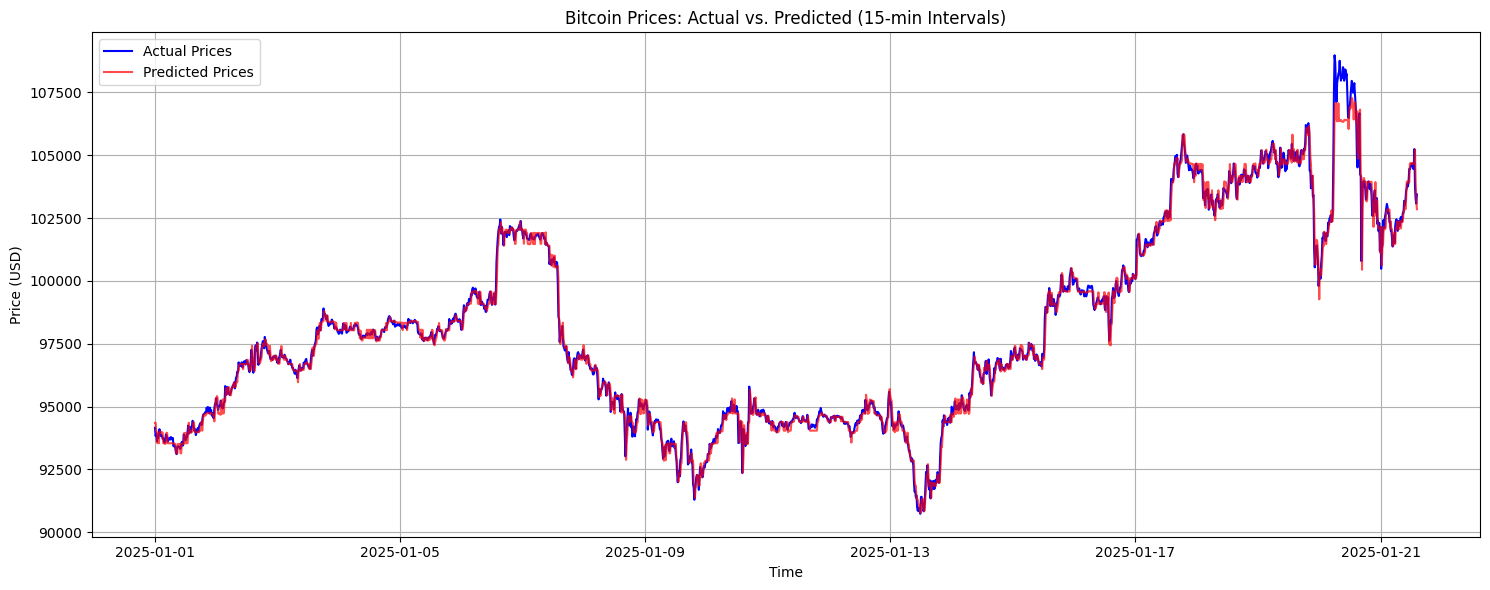

In [18]:
# Generate a time index starting from Jan 1, 2025
start_time = pd.Timestamp("2025-01-01")
time_index = pd.date_range(
    start=start_time, periods=len(y), freq="15T"
)  # 15-minute intervals

# Convert y and y_pred to a DataFrame for easier plotting
data = pd.DataFrame({"Actual": y, "Predicted": y_pred}, index=time_index)

# Plot the actual vs. predicted prices
plt.figure(figsize=(15, 6))
plt.plot(data.index, data["Actual"], label="Actual Prices", color="blue", alpha=1.0)
plt.plot(
    data.index, data["Predicted"], label="Predicted Prices", color="red", alpha=0.7
)
plt.title("Bitcoin Prices: Actual vs. Predicted (15-min Intervals)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

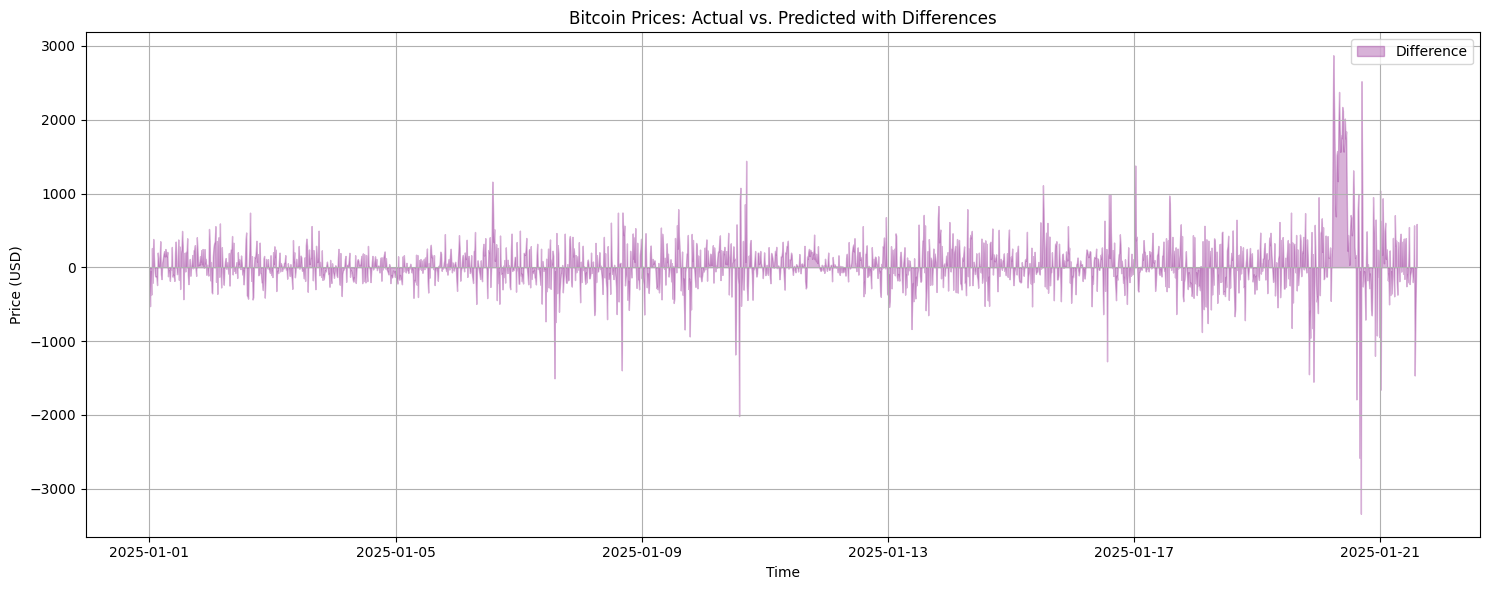

In [20]:
# Calculate the difference
data["Difference"] = data["Actual"] - data["Predicted"]

# Plot actual, predicted, and the difference
plt.figure(figsize=(15, 6))
plt.fill_between(
    data.index, 0, data["Difference"], color="purple", alpha=0.3, label="Difference"
)
plt.title("Bitcoin Prices: Actual vs. Predicted with Differences")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()